<a href="https://colab.research.google.com/github/rajesh-mahara/ML-bootcamp/blob/main/Linear_Regresion_Mobile_phone_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cd /content/drive/MyDrive/Datasets

/content/drive/MyDrive/Datasets


In [5]:
import pandas as pd
df = pd.read_csv("Copy of mobile_prices_2023.csv")

In [ ]:
df.head()

In [8]:
df.columns

Index(['Phone Name', 'Rating ?/5', 'Number of Ratings', 'RAM', 'ROM/Storage',
       'Back/Rare Camera', 'Front Camera', 'Battery', 'Processor',
       'Price in INR', 'Date of Scraping'],
      dtype='object')

In [14]:
df.isnull().sum()

Phone Name             0
Rating ?/5             0
Number of Ratings      0
RAM                    0
ROM/Storage          174
Back/Rare Camera       9
Front Camera         401
Battery               10
Processor             55
Price in INR           0
Date of Scraping       0
dtype: int64

In [15]:
df = df.dropna()

In [16]:
df.isnull().sum()

Phone Name           0
Rating ?/5           0
Number of Ratings    0
RAM                  0
ROM/Storage          0
Back/Rare Camera     0
Front Camera         0
Battery              0
Processor            0
Price in INR         0
Date of Scraping     0
dtype: int64

In [76]:
df.columns

Index(['Phone Name', 'Rating ?/5', 'Number of Ratings', 'RAM', 'ROM/Storage',
       'Back/Rare Camera', 'Front Camera', 'Battery', 'Processor',
       'Price in INR', 'Date of Scraping'],
      dtype='object')

In [ ]:
df = df.drop(['Phone Name','Number of Ratings','Front Camera','Processor','Date of Scraping'], axis = 1)

In [85]:
df = df.drop(['Battery'],axis = 1)

In [86]:
df.columns

Index(['Rating ?/5', 'RAM', 'ROM/Storage', 'Back/Rare Camera', 'Price in INR'], dtype='object')

In [87]:
## Lets encode all of our contents or data in numerical form or else
## the model wiil not be able to understand the characters from the dataset.

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

Ccopy = df.columns

for i in df:
  df[i] = le.fit_transform(df[i])

<ipython-input-88-86c8150e4552>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price in INR'])


<Axes: xlabel='Price in INR', ylabel='Density'>

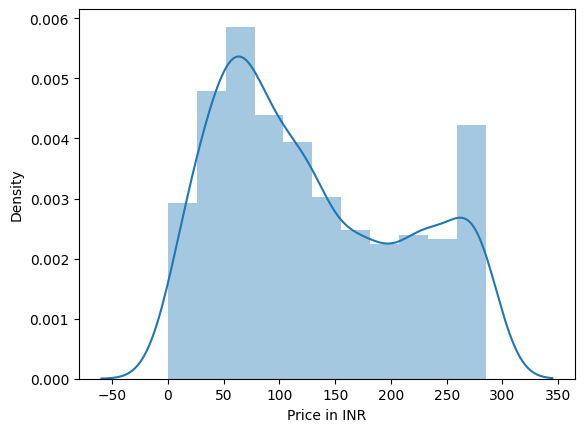

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(df['Price in INR'])

In [ ]:
sns.distplot(df['ROM/Storage'])

In [89]:
X = df.drop(['Price in INR'], axis =1 )
y = df['Price in INR']

In [26]:
print (X.size)
print(y.size)

12910
1291


In [90]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()

scx = mms.fit_transform(X)

In [91]:
X.size

5164

In [92]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(scx, y, test_size = 0.3)

In [93]:
from sklearn.linear_model   import LinearRegression

In [94]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [95]:
y_pred = lr.predict(X_test)

In [96]:
X_train

array([[0.64285714, 0.9       , 0.11111111, 0.69178082],
       [0.5       , 0.6       , 0.77777778, 0.78767123],
       [0.78571429, 0.9       , 0.33333333, 0.42465753],
       ...,
       [0.        , 0.8       , 0.77777778, 0.50684932],
       [0.5       , 0.6       , 0.77777778, 1.        ],
       [0.64285714, 0.9       , 0.11111111, 0.84246575]])

In [ ]:
y_pred

In [ ]:
df.describe()

In [ ]:
df.dtypes

In [ ]:
df.corr

<Axes: >

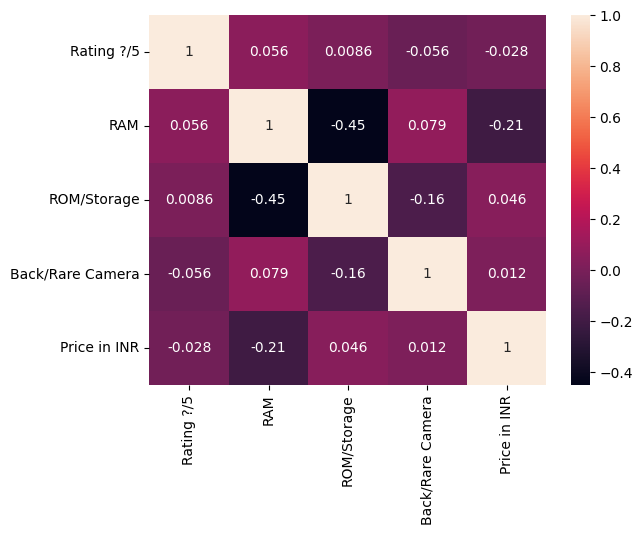

In [99]:
sns.heatmap(df.corr(),annot = True)

In the context of a linear regression model, the coefficient of a feature (also known as a predictor variable or independent variable) represents the change in the dependent variable (the predicted outcome) for a one-unit change in the corresponding feature, while holding all other features constant.

In [100]:
lr.coef_

array([-17.58984247, -92.66315571, -14.44453732,   0.93455489])

In [102]:
 df1 = pd.DataFrame(lr.coef_,X.columns,columns=['coeff'])

In [103]:
df1
## 1 unit change in rating keeping other independent variables increases the price of mobile phone by 22 rs.

,coeff
Rating ?/5,-17.589842
RAM,-92.663156
ROM/Storage,-14.444537
Back/Rare Camera,0.934555


In [69]:
##Making predictions now

In [104]:
predictions = lr.predict(X_test)

In [ ]:
predictions

In [74]:
##We know that "y_test" contains the correct data in the dataset so now let's compare them both.

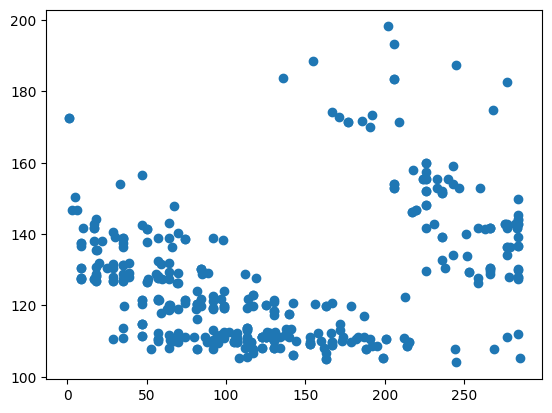

In [105]:
plt.scatter(y_test,predictions)

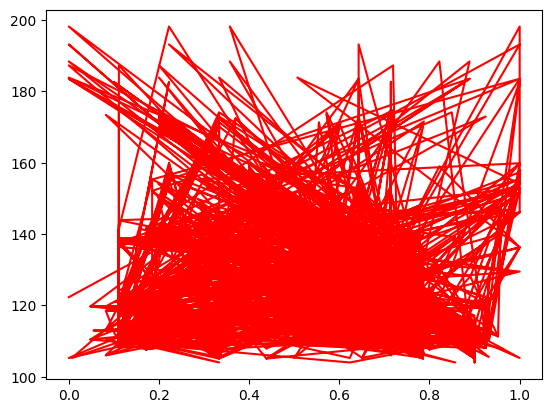

In [106]:
plt.plot(X_test,predictions,color='red', label='predicted values')

In [ ]:
plt.scatter(X_test,y_test, color = 'blue', label = 'actual data')

In [110]:
X_test.size

1552

In [111]:
y_test.size

388

<ipython-input-114-f73d90a72b95>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-predictions)


<Axes: xlabel='Price in INR', ylabel='Density'>

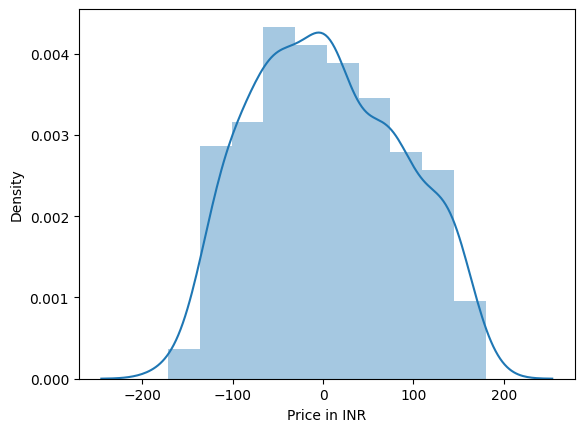

In [114]:
sns.distplot(y_test-predictions)

In [117]:
#MULTIPLE REG PERFORMANCE_MEASURE
import numpy as np
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print("mean absolute error",mean_absolute_error(y_test,predictions))
print("mean squred error",mean_squared_error(y_test,predictions))
print("root mean squred error",np.sqrt(mean_squared_error(y_test,predictions)))

mean absolute error 67.513179087061
mean squred error 6556.503212051823
root mean squred error 80.97223729187569
